## Linking Google Drive to Colab

## Importing essential libraries

In [8]:
from keras.models import load_model
from PIL import Image
import numpy as np
import cv2

%matplotlib inline 
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook


## Loading Age/Gender/Emotion Models

In [18]:
emotion_model = load_model(r"C:\Users\surajsinh\Downloads\emotion_model.h5")
age_model = load_model(r"C:\Users\surajsinh\Downloads\age-model.h5")
gender_model = load_model(r"C:\Users\surajsinh\Downloads\gender-model.h5")

In [19]:
# Labels on Age, Gender and Emotion to be predicted

age_labels = ['1-2', '3-9', '10-20', '21-27', '28-45', '46-65', '66-116']
gender_labels = ['male', 'female']
emotion_labels =['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']

## Loading Test Images

## Results on Age/Gender/Emotion

1: male, 46-65, positive
2: male, 28-45, positive
3: female, 28-45, positive
4: female, 10-20, positive


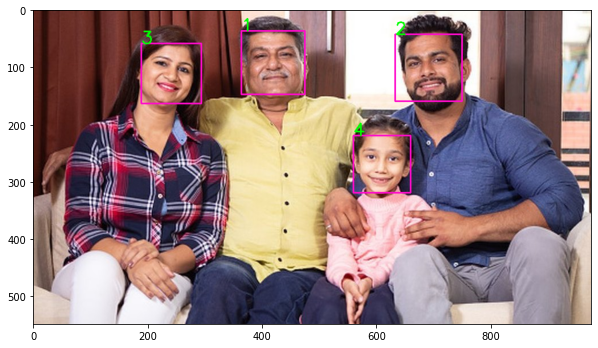

In [ ]:
test_image = cv2.imread(img_path)
gray = cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('./1.4_test_input/cv2_cascade_classifier/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

i = 0

for (x,y,w,h) in faces:
  i = i+1
  cv2.rectangle(test_image,(x,y),(x+w,y+h),(203,12,255),2)

  img_gray=gray[y:y+h,x:x+w]

  emotion_img = cv2.resize(img_gray, (48, 48), interpolation = cv2.INTER_AREA)
  emotion_image_array = np.array(emotion_img)
  emotion_input = np.expand_dims(emotion_image_array, axis=0)
  output_emotion= emotion_ranges[np.argmax(emotion_model.predict(emotion_input))]
  
  gender_img = cv2.resize(img_gray, (100, 100), interpolation = cv2.INTER_AREA)
  gender_image_array = np.array(gender_img)
  gender_input = np.expand_dims(gender_image_array, axis=0)
  output_gender=gender_ranges[np.argmax(gender_model.predict(gender_input))]

  age_image=cv2.resize(img_gray, (200, 200), interpolation = cv2.INTER_AREA)
  age_input = age_image.reshape(-1, 200, 200, 1)
  output_age = age_ranges[np.argmax(age_model.predict(age_input))]


  output_str = str(i) + ": "+  output_gender + ', '+ output_age + ', '+ output_emotion
  print(output_str)
  
  col = (0,255,0)

  cv2.putText(test_image, str(i),(x,y),cv2.FONT_HERSHEY_SIMPLEX,1,col,2)

plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

In [20]:
face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [24]:
import cv2
import numpy as np

# Main loop to capture frames from webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (203, 12, 255), 2)

        # Extract face region
        img_gray = gray[y:y+h, x:x+w]

        # Resize face region for emotion model
        emotion_img = cv2.resize(img_gray, (224, 224), interpolation=cv2.INTER_AREA)
        emotion_img = cv2.cvtColor(emotion_img, cv2.COLOR_GRAY2RGB)  # Convert grayscale to RGB

        emotion_image_array = np.array(emotion_img)
        emotion_input = np.expand_dims(emotion_image_array, axis=0)
        output_emotion = emotion_labels[np.argmax(emotion_model.predict(emotion_input))]

        # Resize face region for gender model
        gender_img = cv2.resize(img_gray, (100, 100), interpolation=cv2.INTER_AREA)
        gender_image_array = np.array(gender_img)
        gender_input = np.expand_dims(gender_image_array, axis=0)
        output_gender = gender_labels[np.argmax(gender_model.predict(gender_input))]

        # Resize face region for age model
        age_image = cv2.resize(img_gray, (200, 200), interpolation=cv2.INTER_AREA)
        age_input = age_image.reshape(-1, 200, 200, 1)
        output_age = age_labels[np.argmax(age_model.predict(age_input))]

        output_str = f"Gender: {output_gender}, Age: {output_age}"
        print(output_str)

        # Display text on the frame
        cv2.putText(frame, output_str, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
        cv2.putText(frame, output_emotion, (x, y+h+20), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Display the frame
    cv2.imshow('Webcam', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close all windows
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 61ms/step
Gender: male, Age: 21-27
1/1 [==============================] - 0s 18ms/step
Gender: male, Age: 28-45
1/1 [==============================] - 0s 17ms/step
Gender: male, Age: 28-45
1/1 [==============================] - 0s 17ms/step
Gender: male, Age: 28-45
1/1 [==============================] - 0s 19ms/step
Gender: male, Age: 10-20
1/1 [==============================] - 0s 18ms/step
Gender: male, Age: 10-20
1/1 [==============================] - 0s 17ms/step
Gender: male, Age: 10-20
1/1 [==============================] - 0s 18ms/step
Gender: male, Age: 10-20
1/1 [==============================] - 0s 20ms/step
Gender: male, Age: 10-20
1/1 [==============================] - 0s 33ms/step
Gender: male, Age: 28-45
1/1 [==============================] - 0s 18ms/step
Gender: male, Age: 28-45
1/1 [==============================] - 0s 16ms/step
Gender: male, Age: 10-20
1/1 [==============================] - 0s 16ms/step
Gender: male, Age: 28-45